In [1]:
from tensorflow import keras
import pickle
from keras.utils import plot_model

### DensetNet201 (10 Neurons, 10 Epochs, 4 Layers)

In [2]:
densenet_10 = keras.models.load_model('DenseNet201_Model_10.h5')

with open('DenseNet201_history_10.pkl', 'rb') as f:
    DenseNet201_history_10 = pickle.load(f)

In [3]:
import matplotlib.pyplot as plt

def training_testing(history, num_neurons, save_path=None):
    # Obtener las métricas del historial
    train_acc = history['accuracy']
    test_acc = history['val_accuracy']
    train_loss = history['loss']
    test_loss = history['val_loss']

    # Gráfica: Accuracy de Entrenamiento vs Accuracy de Testing
    plt.plot(train_acc, label=f'Train Accuracy {num_neurons} Neurons')
    plt.plot(test_acc, label=f'Test Accuracy {num_neurons} Neurons')
    plt.title(f'Accuracy de Entrenamiento vs Accuracy de Testing para {num_neurons} Neuronas')
    plt.xlabel('Época')
    plt.ylabel('Accuracy')
    plt.legend()
    
    if save_path:
        plt.savefig(save_path)
    plt.show()

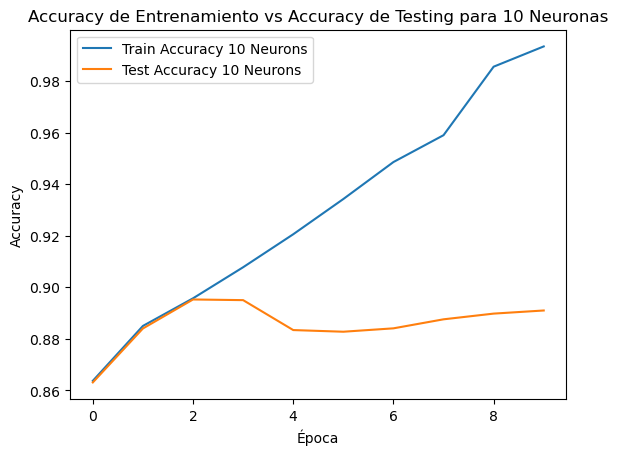

In [4]:
training_testing(history=DenseNet201_history_10, num_neurons=10, save_path='./TrainingVSTesting_10_Neurons.png')

In [5]:
import pickle

# Carga de datos de entrenamiento
with open('../../IDC_train.dat', 'rb') as f:
    (X_train, y_train) = pickle.load(f)

# Carga de datos de test
with open('../../IDC_test.dat', 'rb') as f:
    (X_test, y_test) = pickle.load(f)

# Comprobamos la cantidad de datos que tenemos
print(X_train.shape)
print(y_train.shape)

(222019, 50, 50, 3)
(222019,)


In [6]:
from sklearn.model_selection import train_test_split

# Obtiene el 30% de los datos de entrenamiento
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Obtiene el 30% de los datos de prueba
X_test_subset, _, y_test_subset, _ = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

# Imprime las formas de los conjuntos reducidos
print("Forma de X_train_subset:", X_train_subset.shape)
print("Forma de y_train_subset:", y_train_subset.shape)
print("Forma de X_test_subset:", X_test_subset.shape)
print("Forma de y_test_subset:", y_test_subset.shape)

Forma de X_train_subset: (155413, 50, 50, 3)
Forma de y_train_subset: (155413,)
Forma de X_test_subset: (38853, 50, 50, 3)
Forma de y_test_subset: (38853,)


In [7]:
y_pred_densenet_10 = densenet_10.predict(X_test_subset)

1215/1215 [==============================] - 177s 144ms/step


In [8]:
from sklearn.metrics import roc_auc_score, roc_curve

def roc_curve_func(pred, test_labels, num_neurons, save_path=None):
    # Calcular la curva ROC y el AUC
    fpr, tpr, thresholds = roc_curve(test_labels, pred)
    roc_auc = roc_auc_score(test_labels, pred)

    # Graficar la curva ROC
    plt.plot([0, 1], [0, 1], 'r--')
    plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(roc_auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(f'ROC curve ({num_neurons}) Neurons')
    plt.legend(loc='best')
    
    if save_path:
        plt.savefig(save_path)
    plt.show()
    plt.close()

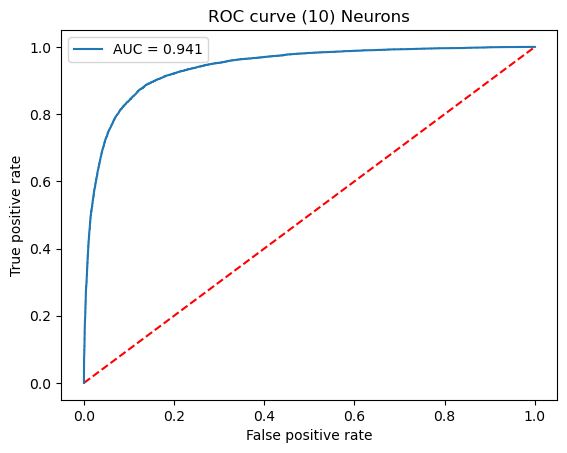

In [9]:
roc_curve_func(pred=y_pred_densenet_10, test_labels=y_test_subset, num_neurons=10, save_path='./ROC_AUC_DenseNet_10_Neurons.png')

Confusion matrix, without normalization
[[25969  1930]
 [ 2305  8649]]


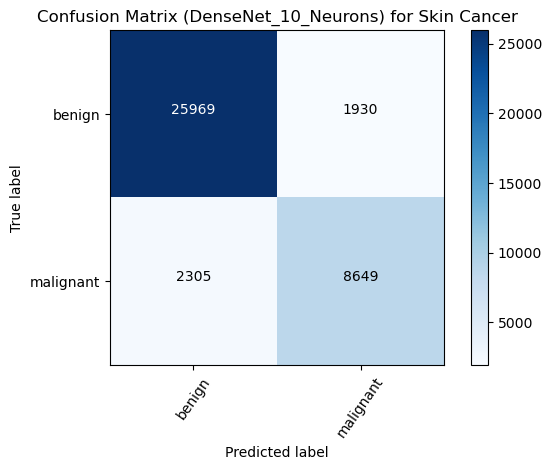

In [10]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, save_path=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    # Guardar la imagen del plot
    if save_path:
        plt.savefig(save_path)

y_pred_binary = (y_pred_densenet_10 >= 0.5).astype(int)
cm = confusion_matrix(y_test_subset, y_pred_binary)

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title='Confusion Matrix (DenseNet_10_Neurons) for Skin Cancer', save_path='./Confusion_Matrix_DenseNet_10_Neurons.png')

### DensetNet201 (20 Neurons, 10 Epochs, 4 Layers)

In [11]:
densenet_20 = keras.models.load_model('DenseNet201_Model_20.h5')

with open('DenseNet201_history_20.pkl', 'rb') as f:
    DenseNet201_history_20 = pickle.load(f)

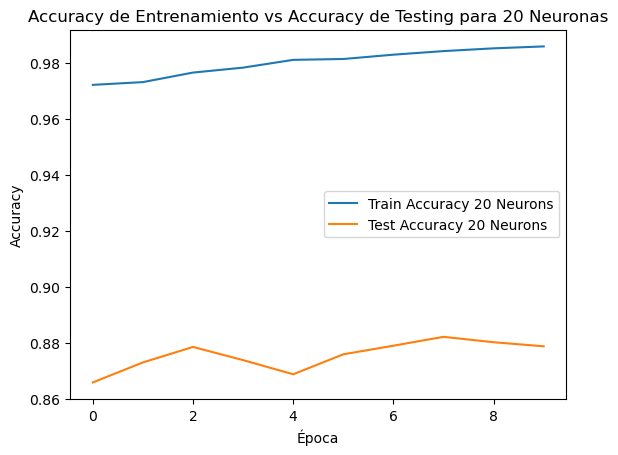

In [12]:
training_testing(history=DenseNet201_history_20, num_neurons=20, save_path='./TrainingVSTesting_20_Neurons.png')

In [13]:
y_pred_densenet_20 = densenet_20.predict(X_test_subset)

1215/1215 [==============================] - 190s 155ms/step


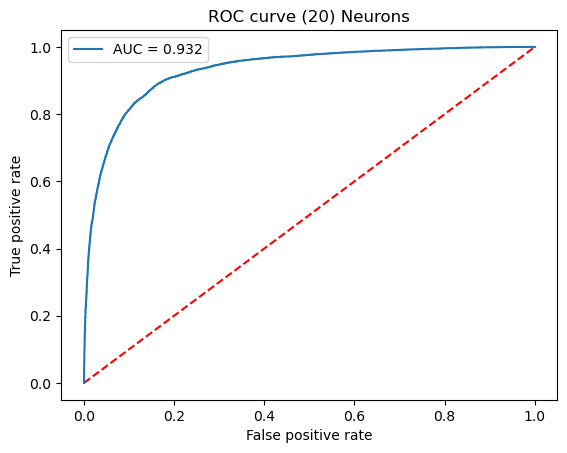

In [14]:
roc_curve_func(pred=y_pred_densenet_20, test_labels=y_test_subset, num_neurons=20, save_path='./ROC_AUC_DenseNet_20_Neurons.png')

Confusion matrix, without normalization
[[25792  2107]
 [ 2601  8353]]


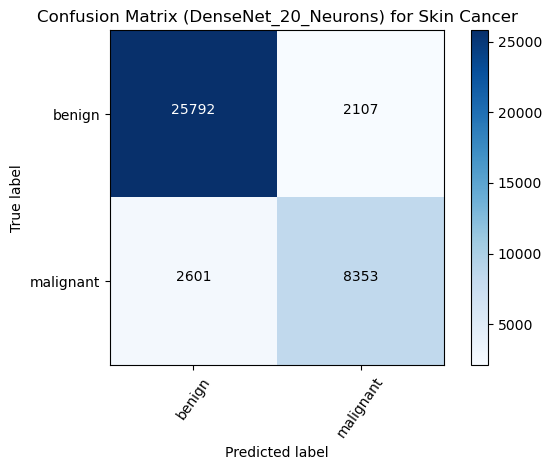

In [15]:
y_pred_binary = (y_pred_densenet_20 >= 0.5).astype(int)
cm = confusion_matrix(y_test_subset, y_pred_binary)

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title='Confusion Matrix (DenseNet_20_Neurons) for Skin Cancer', save_path='./Confusion_Matrix_DenseNet_20_Neurons.png')

### DensetNet201 (30 Neurons, 10 Epochs, 4 Layers)

In [16]:
densenet_30 = keras.models.load_model('DenseNet201_Model_30.h5')

with open('DenseNet201_history_30.pkl', 'rb') as f:
    DenseNet201_history_30 = pickle.load(f)

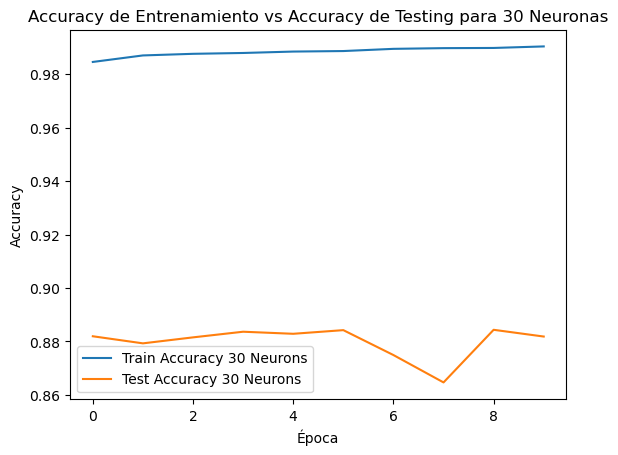

In [17]:
training_testing(history=DenseNet201_history_30, num_neurons=30, save_path='./TrainingVSTesting_30_Neurons.png')

In [18]:
y_pred_densenet_30 = densenet_30.predict(X_test_subset)

1215/1215 [==============================] - 203s 165ms/step


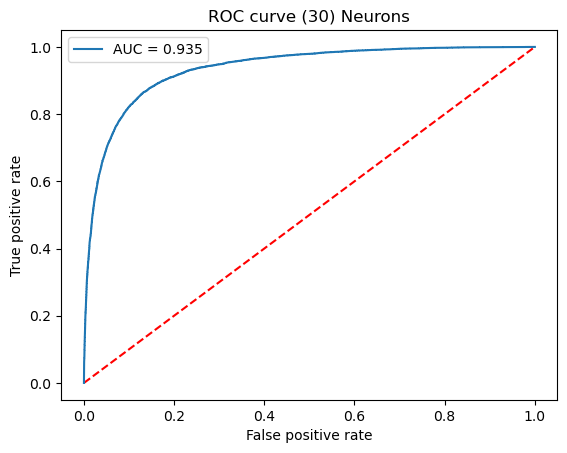

In [19]:
roc_curve_func(pred=y_pred_densenet_30, test_labels=y_test_subset, num_neurons=30, save_path='./ROC_AUC_DenseNet_30_Neurons.png')

Confusion matrix, without normalization
[[26116  1783]
 [ 2808  8146]]


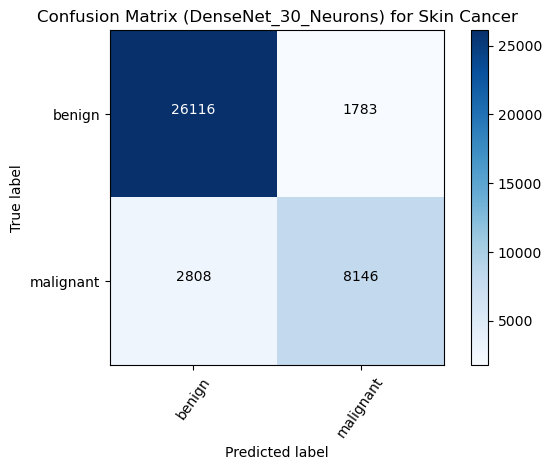

In [20]:
y_pred_binary = (y_pred_densenet_30 >= 0.5).astype(int)
cm = confusion_matrix(y_test_subset, y_pred_binary)

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title='Confusion Matrix (DenseNet_30_Neurons) for Skin Cancer', save_path='./Confusion_Matrix_DenseNet_30_Neurons.png')